In [1]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
import numpy as np
from scipy.cluster.vq import kmeans,vq
import pandas as pd
import pandas_datareader as dr
from math import sqrt
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import math

# Load Data

In [2]:
sp500 = pd.read_excel('SP500_StockPrice.xlsx', header = [0, 1])

# Set Up

In [3]:
sp500

MMM                                    AOS                    \
            Adj Open  Adj High   Adj Low Adj Close Adj Open Adj High  Adj Low   
Date                                                                            
2005-01-03   57.9782   58.8461   57.8935   58.1405   5.3863   5.4475   5.2460   
2005-01-04   58.1405   58.5780   57.6254   57.6677   5.2892   5.3072   5.1435   
2005-01-05   57.6466   57.8230   56.9622   56.9622   5.1453   5.1453   4.9654   
2005-01-06   57.0680   58.1405   57.0257   57.4772   4.9942   5.0589   4.9762   
2005-01-07   57.5055   58.4227   57.3291   58.0699   5.0553   5.0571   4.9474   
2005-01-10   58.0699   59.4811   58.0699   59.2271   5.0193   5.0373   4.9474   
2005-01-11   59.2342   59.9680   59.1636   59.7704   4.9744   4.9852   4.8394   
2005-01-12   59.6787   59.9750   59.2694   59.9468   4.8394   4.8394   4.7585   
2005-01-13   59.7351   60.3278   58.9237   59.1213   4.7963   4.8376   4.7585   
2005-01-14   59.1213   59.4458   58.6344   59.2483   4.7927   4.8340   4.7531   
2005-01-18   59.2624   59.9750   57.5901   57.8724   4.7621   4.8358   4.7315   
2005-01-19   58.2110   58.4157   57.9288   57.9782   4.7675   4.8107   4.7495   
2005-01-20   58.3522   58.9519   57.9147   58.5286   4.7549   4.9240   4.7495   
2005-01-21   58.3874   58.6484   57.2797   57.3432   4.9690   5.0301   4.8988   
2005-01-24   57.5055   57.8300   57.0045   57.5901   4.9006   4.9780   4.8053   
2005-01-25   57.9641   58.5780   57.8653   58.4368   4.8502   4.9294   4.8430   
2005-01-26   58.5427   59.2059   58.5427   58.8602   4.8682   4.9150   4.8646   
2005-01-27   58.5638   58.9166   58.1687   58.4862   4.8953   4.9190   4.8735   
2005-01-28   58.4862   58.8461   58.4157   58.7402   4.8881   4.9244   4.8590   
2005-01-31   58.9872   59.6222   58.9872   59.5234   4.8935   4.9571   4.8735   
2005-02-01   59.5164   59.7633   59.1283   59.3259   4.9353   5.0970   4.9244   
2005-02-02   59.1071   59.1213   58.7120   58.8037   5.0734   5.0934   5.0516   
2005-02-03   58.8461   59.0436   58.5286   58.8037   5.0879   5.0879   5.0153   
2005-02-04   58.9519   59.4176   58.8602   59.3259   5.0879   5.1061   5.0607   
2005-02-07   59.3047   59.6222   59.1001   59.1848   5.1188   5.1970   5.0770   
2005-02-08   58.9519   59.6928   58.7544   59.5093   5.1170   5.1297   5.0334   
2005-02-09   59.5093   59.5305   58.7050   58.8108   5.0970   5.1079   4.9826   
2005-02-10   58.8390   59.3259   58.8108   59.1989   4.9935   5.0044   4.9190   
2005-02-11   59.2553   59.6363   58.7332   59.2977   4.9062   4.9789   4.8608   
2005-02-14   59.6011   59.9397   59.3753   59.6998   4.9608   4.9935   4.9335   
...              ...       ...       ...       ...      ...      ...      ...   
2018-11-09  204.0000  204.0000  199.6970  201.1000  46.5600  46.9400  45.2000   
2018-11-12  200.5700  200.7700  196.5000  197.0400  45.6900  45.9400  45.2000   
2018-11-13  197.5200  200.8800  197.1600  198.3700  45.6700  46.9000  45.5500   
2018-11-14  200.8000  201.0400  196.2900  198.0600  46.1300  46.5700  44.9400   
2018-11-15  197.7300  205.1300  196.2400  204.9100  44.8100  46.5800  44.6400   
2018-11-16  203.2400  209.7700  202.6040  209.0000  46.0200  46.4400  45.7100   
2018-11-19  207.8300  208.0500  204.3710  205.5800  45.8400  46.4000  45.5500   
2018-11-20  203.5800  204.1350  200.1900  200.5100  45.0400  46.2300  44.8700   
2018-11-21  199.6800  201.1800  198.6600  198.6900  45.7400  46.4700  45.6400   
2018-11-23  197.7600  198.6800  196.7900  196.8000  45.5100  46.0550  45.4200   
2018-11-26  198.5700  201.8300  197.3200  199.8600  46.0000  46.4600  45.8200   
2018-11-27  199.1200  201.3200  196.7790  200.6900  47.3000  47.4770  45.8500   
2018-11-28  201.9900  204.3500  199.4200  204.3400  46.3000  47.2200  45.4500   
2018-11-29  203.8700  205.8400  202.6600  204.5600  46.9800  47.1750  46.2900   
2018-11-30  204.3600  207.9200  203.9800  207.9200  46.8300  47.5900  46.5000   
2018-12-03  211.2100  211.9500  207.0500  208.76

In [4]:
subcol = ['Adj Open', 'Adj High', 'Adj Low']
#drop sub columns
sp500_sorted = sp500.drop(subcol, level = 1, axis = 1)
#drop sub colums level 1
sp500_sorted.columns = sp500_sorted.columns.droplevel(1)
sp500_sorted

,MMM,AOS,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AMD,...,WYNN,XEL,XRX,XLNX,XL,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-03,58.1405,5.2748,17.6798,NaN,20.4231,5.0209,26.8012,30.8392,27.6673,21.41,...,38.1389,10.3113,35.8512,21.5270,53.4915,NaN,12.9945,74.7168,56.7201,NaN
2005-01-04,57.6677,5.1561,17.5017,NaN,19.9429,4.8904,26.2580,30.0244,27.4831,20.21,...,38.0574,10.1568,35.3231,20.9166,53.6174,NaN,12.8224,74.6885,55.9458,NaN
2005-01-05,56.9622,4.9870,17.3010,NaN,19.8655,4.9621,25.0577,29.8594,27.5339,19.75,...,38.4880,10.0424,34.6259,20.2546,53.1070,NaN,12.7919,74.1050,55.7438,NaN
2005-01-06,57.4772,5.0535,17.6912,NaN,19.6873,4.8930,23.9275,29.3645,27.5085,19.72,...,40.0473,10.0252,34.4780,19.9310,53.1419,NaN,12.9362,74.9615,56.0636,NaN
2005-01-07,58.0699,5.0373,17.9942,NaN,20.6090,4.7293,25.6097,29.3845,27.3497,19.92,...,38.7149,9.9680,34.2879,20.1002,53.2048,NaN,12.8641,74.8297,54.7001,NaN
2005-01-10,59.2271,4.9762,18.1685,NaN,20.8800,4.7728,25.1891,29.4045,27.4450,20.13,...,38.8662,10.1053,34.0978,20.1370,53.1559,NaN,12.8668,75.5451,54.7338,NaN
2005-01-11,59.7704,4.8394,17.8351,NaN,20.5238,5.1027,25.1103,29.0545,27.6102,14.86,...,38.8196,10.1396,34.1611,19.7987,53.0440,NaN,12.9085,75.2251,54.7675,NaN
2005-01-12,59.9468,4.7927,17.8255,NaN,20.4386,5.0516,25.2417,29.4845,27.5085,15.02,...,38.1854,10.1282,34.2456,19.8134,53.2188,NaN,12.8058,75.0086,54.2540,NaN
2005-01-13,59.1213,4.7891,17.4837,NaN,20.2759,5.4173,24.9863,29.1045,27.4513,15.16,...,37.9702,10.2255,33.8231,19.3794,53.7013,NaN,12.6222,72.6272,53.6228,NaN


training set from 2005-01-03 to 2016-12-30

In [5]:
returns = np.log(sp500_sorted[0:3021]).diff().mean() * 252 ###############
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = np.log(sp500_sorted[0:3021]).diff().std() * sqrt(252) ##################
returns.dropna(inplace = True)
returns

,Returns,Volatility
MMM,0.090085,0.216496
AOS,0.181532,0.356813
ABT,0.061343,0.203863
ABBV,0.180369,0.273371
ACN,0.142568,0.258949
ATVI,0.163701,0.358701
AYI,0.179133,0.366555
ADBE,0.100588,0.336640
AAP,0.150775,0.316681
AMD,-0.053030,0.586054


In [6]:
#sharpratio = (returns['Returns'] - 0.024)/returns['Volatility']

# K-Means

# Cross Validation

Elbow Curve

Text(0.5, 1.0, 'Elbow Curve')

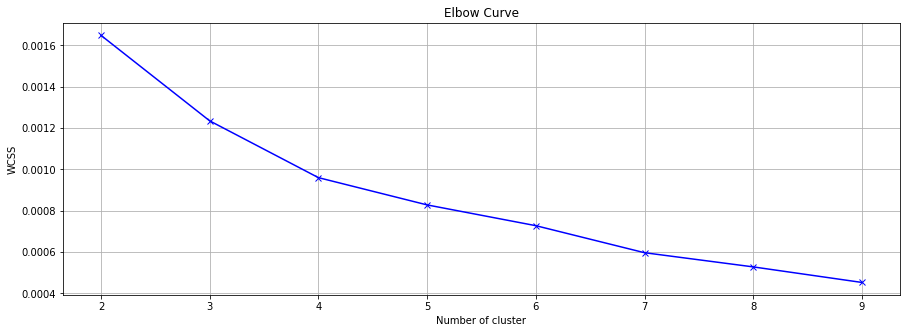

In [7]:
#format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T
X = data
distorsions = []
rf = 0.024 # Risk-free rate
y = (X[:,0] - rf) / X[:,1] # Sharpe Ratio



for k in range(2, 10):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10)
    k_means.fit(X)
    distorsions.append(k_means.inertia_/(len(sp500_sorted)-k)) #inertia_ = Sum of squared distances of samples to their closest cluster center.
 
fig = plt.figure(figsize=(15, 5))
plt.xticks(np.arange(0, 10, step = 1))
plt.plot(range(2, 10), distorsions,'bx-')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.grid(True)
plt.title('Elbow Curve')

Silhouette Coefficient

a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation)

In [8]:
from sklearn import cluster, datasets, metrics


# how many clusters
kmeans_fit = cluster.KMeans(n_clusters = 3).fit(X)
cluster_labels = kmeans_fit.labels_

kmeans_fit2 = cluster.KMeans(n_clusters = 4).fit(X)
cluster_labels2 = kmeans_fit2.labels_

# more near to 1, the best
silhouette_avge = metrics.silhouette_score(X, cluster_labels)
silhouette_avge2 = metrics.silhouette_score(X, cluster_labels2)
print(silhouette_avge)#3 clusters
print(silhouette_avge2)#4 clusters

0.3851772046128272
0.39550059393968423


# Clustering Plot

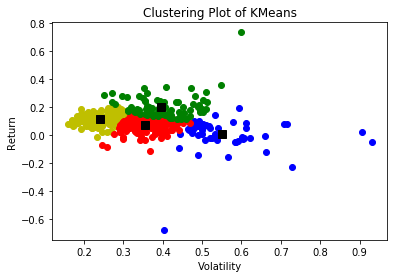

In [9]:
# computing K-Means with K = 5 (5 clusters) #################
centroids,_ = kmeans(X,4)
# assign each sample to a cluster
idx,_ = vq(data,centroids)
 
# some plotting using numpy's logical indexing
plot(data[idx==0,1],data[idx==0,0],'ob',
     data[idx==1,1],data[idx==1,0],'oy',
     data[idx==2,1],data[idx==2,0],'or',
     data[idx==3,1],data[idx==3,0],'og',)
plot(centroids[:,1],centroids[:,0],'sk',markersize=8)
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Clustering Plot of KMeans')
show()

In [10]:
#identify the outlier
#print(returns['Volatility'].idxmax())
#print(returns['Returns'].idxmin())

In [11]:
#drop the relevant stock from our data
#returns.drop('EVHC',inplace=True)
#returns.drop('UA',inplace=True)
#print(returns['Volatility'].idxmax())

In [12]:
#returns.drop('GGP',inplace=True)

In [13]:
km4 = KMeans(init='k-means++', n_clusters=4, n_init=10) ############
km = km4.fit(X)
print(km.labels_)
result = km.labels_
result = pd.DataFrame(result, columns = ['cluster'])
result.groupby('cluster').size()

[0 3 0 0 0 3 3 2 0 1 2 2 2 2 2 0 3 3 2 2 3 3 0 0 2 0 2 0 0 0 3 0 1 0 2 1 0
 0 2 0 0 0 0 2 0 3 0 0 0 2 2 3 2 0 2 1 0 2 0 2 0 0 2 0 0 1 0 2 0 0 2 2 2 2
 0 2 2 2 0 3 0 0 0 3 2 0 2 0 2 2 2 0 1 3 3 2 0 0 0 3 2 3 1 0 3 0 0 2 2 0 0
 0 1 0 2 2 0 0 2 0 0 2 0 3 2 0 0 2 0 2 0 2 0 3 0 1 0 2 0 2 1 0 2 3 2 2 2 2
 0 0 0 0 0 0 0 1 1 2 0 2 0 0 0 2 0 0 1 3 2 0 3 2 2 0 0 0 0 2 2 0 3 0 3 3 0
 2 0 0 1 0 0 2 3 2 2 2 2 0 3 2 1 2 2 3 0 0 1 0 0 0 0 0 2 2 0 2 2 2 0 1 0 3
 2 3 0 2 3 0 2 0 0 0 2 2 3 1 0 0 0 0 3 3 2 0 3 0 2 2 0 0 3 2 0 0 0 2 0 0 0
 2 2 2 0 1 0 2 2 2 2 0 0 2 0 0 2 0 1 2 0 1 3 0 0 0 3 2 2 2 2 3 2 0 2 2 3 0
 0 0 0 0 0 2 0 1 2 0 1 0 2 2 0 0 2 3 2 1 2 2 3 2 2 2 3 2 2 2 0 0 0 0 0 0 2
 2 0 2 0 0 2 2 3 0 2 0 0 0 2 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 3 2 2 0 0 0 3 1
 0 0 2 2 0 2 1 2 1 2 2 0 2 2 0 2 2 2 3 1 0 0 2 2 0 0 0 2 2 3 3 0 2 0 2 2 0
 0 2 2 3 1 0 0 2 0 0 1 0 0 1 2 0 0 0 2 2 0 2 2 0 2 2 0 2 0 2 0 0 0 2 0 0 2
 0 3 3 2 2 2 2 2 2 3 3 1 0 1 2 0 3 0 0 2 0 2 0 2 2 0 0 3 2 3 2 2 0 0 0 0 0
 2 0 3 2 2 2 2 2 0 2 1 0 

cluster
0    227
1     36
2    180
3     58
dtype: int64

In [14]:
centroids,_ = kmeans(data,4)
centroids = km.cluster_centers_
rf = 0.024
s = (centroids[:,0] - rf) / centroids[:,1]
centroids = pd.DataFrame(centroids, columns=['Centroid_Returns', 'Centroid_Volatility']) 
sharp = pd.DataFrame(s, columns=['Centroid_Sharpratio'] )
centroids.join(sharp)

,Centroid_Returns,Centroid_Volatility,Centroid_Sharpratio
0,0.109354,0.252364,0.338216
1,-0.030717,0.583186,-0.093824
2,0.075036,0.381276,0.133857
3,0.223125,0.421586,0.472324


# Model Diagnostic

RMSE:  0.1772
STD(y):  0.2358
Goodness-of-fit Measure: 0.4354


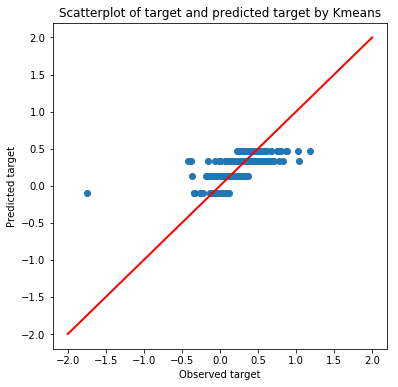

In [15]:
from sklearn.metrics import r2_score
yhat = s[km4.predict(X)]
print("RMSE: ", np.round(np.sqrt(((y - yhat)**2).mean(axis=0)),4))
print("STD(y): ", np.round(y.std(),4))
print("Goodness-of-fit Measure:", np.round(r2_score(y, yhat),4))

plt.figure(1, figsize=(6,6))
plt.title("Scatterplot of target and predicted target by Kmeans")
plt.ylabel("Predicted target")
plt.xlabel("Observed target")
plt.scatter(y=yhat, x=y)
plt.plot([-2,2], [-2,2], "r-", linewidth=2)
plt.show()

In [16]:
idx,_=vq(data,centroids)
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]
detail = pd.DataFrame(details, columns=['tick','cluster'])
detail
chosen_tick=[]
for i in range(0,len(detail)):
    if detail['cluster'][i]==3:
        chosen_tick.append(detail['tick'][i])
len(chosen_tick)

58

In [17]:
chosen_tick

['AOS',
 'ATVI',
 'AYI',
 'AKAM',
 'ALK',
 'ALXN',
 'ALGN',
 'AMZN',
 'ANDV',
 'AAPL',
 'AVGO',
 'COG',
 'CBS',
 'CELG',
 'CF',
 'CHTR',
 'CMG',
 'CXO',
 'CMI',
 'DLR',
 'EOG',
 'EQIX',
 'EXR',
 'FFIV',
 'FB',
 'FLS',
 'FBHS',
 'IT',
 'HCA',
 'HP',
 'HPE',
 'HUM',
 'ILMN',
 'INCY',
 'ICE',
 'ISRG',
 'LKQ',
 'LYB',
 'MPC',
 'MA',
 'MNST',
 'NDAQ',
 'NFLX',
 'NVDA',
 'PXD',
 'PCLN',
 'REGN',
 'CRM',
 'SBAC',
 'SWKS',
 'TSCO',
 'TDG',
 'ULTA',
 'UAA',
 'URI',
 'VRTX',
 'V',
 'WDC']

In [18]:
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]

for detail in details:
    print(detail)

('MMM', 0)
('AOS', 3)
('ABT', 0)
('ABBV', 0)
('ACN', 0)
('ATVI', 3)
('AYI', 3)
('ADBE', 2)
('AAP', 0)
('AMD', 1)
('AES', 2)
('AET', 2)
('AMG', 2)
('AFL', 2)
('A', 2)
('APD', 0)
('AKAM', 3)
('ALK', 3)
('ALB', 2)
('ARE', 2)
('ALXN', 3)
('ALGN', 3)
('ALLE', 0)
('AGN', 0)
('ADS', 2)
('LNT', 0)
('ALL', 2)
('GOOGL', 0)
('GOOG', 0)
('MO', 0)
('AMZN', 3)
('AEE', 0)
('AAL', 1)
('AEP', 0)
('AXP', 2)
('AIG', 1)
('AMT', 0)
('AWK', 0)
('AMP', 2)
('ABC', 0)
('AME', 0)
('AMGN', 0)
('APH', 0)
('APC', 2)
('ADI', 0)
('ANDV', 3)
('ANSS', 0)
('ANTM', 0)
('AON', 0)
('APA', 2)
('AIV', 2)
('AAPL', 3)
('AMAT', 2)
('APTV', 0)
('ADM', 2)
('ARNC', 1)
('AJG', 0)
('AIZ', 2)
('T', 0)
('ADSK', 2)
('ADP', 0)
('AZO', 0)
('AVB', 2)
('AVY', 0)
('BLL', 0)
('BAC', 1)
('BAX', 0)
('BBT', 2)
('BDX', 0)
('BRK.B', 0)
('BBY', 2)
('BIIB', 2)
('BLK', 2)
('HRB', 2)
('BA', 0)
('BWA', 2)
('BXP', 2)
('BSX', 2)
('BMY', 0)
('AVGO', 3)
('BF.B', 0)
('CHRW', 0)
('CA', 0)
('COG', 3)
('CDNS', 2)
('CPB', 0)
('COF', 2)
('CAH', 0)
('KMX', 2)
(

# Functions

In [19]:
def MA(df, n):
    MA = df.rolling(n).mean()
    MA.columns = df.columns
    return MA
# Bollinger Bands
def BBANDS(df, n, multiple, H_price_name='High', L_price_name='Low', C_price_name='Adj Close'):
    MA = df.rolling(n).mean()
    MSD = df.rolling(n).std()
    ub1 = MA + multiple * MSD
    uB1 = pd.DataFrame(ub1, index=df.index, columns=df.columns)
    lb1 = MA - multiple * MSD
    lB1 = pd.DataFrame(lb1, index=df.index, columns=df.columns)
    b2 = (df - MA + multiple * MSD) / (2 * multiple * MSD)
    B2 = pd.DataFrame(b2, index=df.index, columns=df.columns)
    BBAND = pd.concat([MA, uB1, lB1, B2], keys=['Mean', 'UpperBand', 'LowerBand', '%B'], axis=1)
    return BBAND
# Average True Range
def ATR(df, n, H_price_name='High', L_price_name='Low', C_price_name='Close'):
    i = 0
    TR_l = [0]
    while i < len(df.index) - 1:
        TR = max(df[H_price_name][i + 1], df[C_price_name][i]) - min(df[L_price_name][i + 1], df[C_price_name][i])
        TR_l.append(TR)
        i = i + 1
    TR_s = pd.Series(TR_l, index=df.index)
    ATR = pd.DataFrame(TR_s.ewm(span=n, min_periods=n).mean(), columns=['ATR_%s' % n])
    return ATR
# Momentum
def MOM(df, n, C_price_name='Close'):
    M = pd.Series(df[C_price_name].diff(n), name='Momentum_' + str(n))
    return M
# Keltner Channel
def KELCH(df, n, std, H_price_name='High', L_price_name='Low', C_price_name='Close'):
    KelChM = pd.Series(df[C_price_name].rolling(n).mean())
    ATR_value = ATR(df, n, H_price_name, L_price_name, C_price_name)['ATR_%s' % n]
    KelChU = KelChM + std * ATR_value
    KelChD = KelChM - std * ATR_value

    KEL = pd.concat([KelChU, KelChM, KelChD], keys=['KelChU', 'KelChM', 'KelChD'], axis=1)
    return KEL
# Keltner Channel
def SQUEEZE(df, b_n, b_std, k_n, k_std, H_price_name='High', L_price_name='Low', C_price_name='Close'):
    BBAND = BBANDS(df[[C_price_name]], b_n, b_std)
    BBAND.columns = BBAND.columns.get_level_values(0)
    UB_B = BBAND['UpperBand']
    LB_B = BBAND['LowerBand']

    KEL = KELCH(df, k_n, k_std, H_price_name, L_price_name, C_price_name)
    UB_K = KEL['KelChU']
    LB_K = KEL['KelChD']

    check = pd.concat([BBAND, KEL], axis=1)

    Signal = pd.DataFrame(((UB_B < UB_K) & (LB_B > LB_K)).astype(int), columns=['squeeze'])
    Signal['Momentum'] = MOM(df, k_n, C_price_name)

    return Signal, check
# Relative Strength Index
def RSI(df, n, H_price_name='High', L_price_name='Low'):
    i = 0
    UpI = [0]
    DoI = [0]
    while i + 1 <= len(df.index) - 1:
        UpMove = df[H_price_name][i + 1] - df[H_price_name][i]
        DoMove = df[L_price_name][i] - df[L_price_name][i + 1]
        if UpMove > DoMove and UpMove > 0:
            UpD = UpMove
        else:
            UpD = 0
        UpI.append(UpD)
        if DoMove > UpMove and DoMove > 0:
            DoD = DoMove
        else:
            DoD = 0
        DoI.append(DoD)
        i = i + 1
    UpI = pd.DataFrame(UpI, index=df.index)
    DoI = pd.DataFrame(DoI, index=df.index)
    PosDI = pd.DataFrame(UpI.ewm(span=n, min_periods=n - 1).mean())
    NegDI = pd.DataFrame(DoI.ewm(span=n, min_periods=n - 1).mean())
    RSI = 100.0 - 100.0 / (1 + (PosDI / NegDI))
    RSI.columns = ['RSI']
    return RSI
# MACD, MACD Signal and MACD difference
def MACD(df, n_fast, n_slow, C_price_name='Close'):
    EMAfast = df[C_price_name].ewm(span=n_fast, min_periods=n_slow - 1).mean()
    EMAslow = df[C_price_name].ewm(span=n_slow, min_periods=n_slow - 1).mean()
    MACD = pd.Series(EMAfast - EMAslow, name='MACD_' + str(n_fast) + '_' + str(n_slow))
    MACDsign = pd.Series(MACD.ewm(span=9, min_periods=8).mean(), name='MACDsign_' + str(n_fast) + '_' + str(n_slow))
    MACDdiff = pd.Series(MACD - MACDsign, name='MACDdiff_' + str(n_fast) + '_' + str(n_slow))
    MACD = pd.concat([MACD, MACDsign, MACDdiff], axis=1)

    return MACD
def performance_matrics(port_value, output=False):
    # annual volatility
    ann_vol = np.log(port_value).diff().std() * np.sqrt(252)
    port_return = pd.DataFrame(index=port_value.index[:], columns=['Values'])
    port_return['Values'] = port_value.pct_change()

    # cumulative return series & max drawdown, max drawdown duration
    port_cum_series = pd.DataFrame(index=port_return.index[:],
                                   columns=['CumulativeReturn', 'WaterMark', 'Drawdown', 'Dwn_Duration'])

    for i in range(len(port_return)):
        if i == 0:
            port_cum_series['CumulativeReturn'].iloc[i] = 0
            port_cum_series['WaterMark'].iloc[i] = port_cum_series['CumulativeReturn'].iloc[i]
        else:
            port_cum_series['CumulativeReturn'].iloc[i] = (1 + port_return['Values'].iloc[i]) * (
                        1 + port_cum_series['CumulativeReturn'].iloc[i - 1]) - 1
            if port_cum_series['CumulativeReturn'].iloc[i] > port_cum_series['WaterMark'].iloc[i - 1]:
                port_cum_series['WaterMark'].iloc[i] = port_cum_series['CumulativeReturn'].iloc[i]
            else:
                port_cum_series['WaterMark'].iloc[i] = port_cum_series['WaterMark'].iloc[i - 1]

        port_cum_series['Drawdown'].iloc[i] = ((1 + port_cum_series['WaterMark'].iloc[i]) - (
                    1 + port_cum_series['CumulativeReturn'].iloc[i])) / (1 + port_cum_series['WaterMark'].iloc[i])
        if i == 0:
            port_cum_series['Dwn_Duration'].iloc[i] = 0
        else:
            if port_cum_series['Drawdown'].iloc[i] != 0:
                port_cum_series['Dwn_Duration'].iloc[i] = port_cum_series['Dwn_Duration'].iloc[i - 1] + 1
            else:
                port_cum_series['Dwn_Duration'].iloc[i] = 0

    max_drawdown = port_cum_series['Drawdown'].max()
    max_dwn_duration = port_cum_series['Dwn_Duration'].max()
    total_return = port_value.iloc[-1] / port_value.iloc[0] - 1

    # annual return
    ann_return = (1 + total_return) ** (1 / float((len(port_value)) / 252.0)) - 1

    # sharpe ratio
    rf = 0.024
    sharpe_ratio = (ann_return - rf) / ann_vol

    print('annual volatility:{}'.format(ann_vol.iloc[0]))
    print('annual return:{}'.format(ann_return.iloc[0]))
    print('sharpe ratio:{}'.format(sharpe_ratio.iloc[0]))
    print('max drawdown:{}'.format(max_drawdown))
    print('max down duration:{} days'.format(max_dwn_duration))
def record_transaction(symbol, action_side, date, price, quantity, fee, transaction_history):
    '''
    action_side: long or close
    date: date for executing the action
    quantity: position size
    fee: one trip cost
    transaction_history: record all the transaction here
    '''

    info = {
        'Date': date,
        'Action': action_side,
        'Price': price,
        'Quantity': quantity,
        'Fee': fee
    }
    if symbol in transaction_history:
        transaction_history[symbol].append(info)
    else:
        transaction_history.update({symbol: [info]})

    return transaction_history
def record_holdings(symbol, starting_point, price, shares_change, fee, holdings, target=np.nan):
    '''
    starting_point: date for executing the action
    quantity: +/- position size
    fee: one trip cost
    holdings: record all the stock holdings info
    target: default is "nan", or you can specify the price level you prefer
    '''
    if symbol in holdings:

        if math.isnan(target):
            target = holdings[symbol]['Target']

        info = {
            'Index': starting_point,
            'Price': price,
            'Quantity': holdings[symbol]['Quantity'] + shares_change,
            'Fee': fee,
            'Target': target
        }
        if info['Quantity'] == 0:
            del holdings[symbol]
        else:
            holdings[symbol].update(info)
    else:
        info = {
            'Index': starting_point,
            'Price': price,
            'Quantity': shares_change,
            'Fee': fee,
            'Target': target
        }
        holdings.update({symbol: info})

    return holdings

# Setting

In [20]:
#strategy parameters
int_capital = 1000000
pos_num = 10
capital_per_trade_pct = 1. / pos_num
bband_mean = 20
bband_stdev = 2

In [21]:
Mat_col = []
for i in range(505):
    Mat_col.append(list(sp500)[i*4][0])
PriceMat = sp500[3021:] ###################
#delet it if labels not in chosen
for symbol in Mat_col:
    if symbol not in chosen_tick:
        PriceMat.drop(symbol,axis = 1,inplace=True)

#if want to run the chosen tick, change all the Mat_col to chosen_tick
newPriceMat = pd.DataFrame(data=np.zeros((len(PriceMat), len(chosen_tick))), index=pd.to_datetime(PriceMat.index[:]), columns = chosen_tick)
for symbol in chosen_tick:
    newPriceMat[symbol] = PriceMat[symbol]['Adj Close']

/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# K-Means Chosen Set Main( ) for Strategy

testing set from 2017-01 to 2018-12-24

In [22]:
SignalMat = BBANDS(newPriceMat, bband_mean, bband_stdev)
SquSingal = pd.DataFrame(data=np.zeros((len(PriceMat), len(chosen_tick))), index=pd.to_datetime(PriceMat.index[:]), columns = chosen_tick)
MoSingal = pd.DataFrame(data=np.zeros((len(PriceMat), len(chosen_tick))), index=pd.to_datetime(PriceMat.index[:]), columns = chosen_tick)
for symbol in chosen_tick:
    SquSingal[symbol] = SQUEEZE(PriceMat[symbol], 20, 2, 20, 2, 'Adj High', 'Adj Low', 'Adj Close')[0]['squeeze']
    MoSingal[symbol] = SQUEEZE(PriceMat[symbol], 20, 2, 20, 2, 'Adj High', 'Adj Low', 'Adj Close')[0]['Momentum']

cash_value = pd.DataFrame(data=np.zeros((len(PriceMat), 1)), index=PriceMat.index[:], columns=['Values'])
pos_value = pd.DataFrame(data=np.zeros((len(PriceMat), 1)), index=PriceMat.index[:], columns=['Values'])
total_port_valuekmeans = pd.DataFrame(data=np.zeros((len(PriceMat), 1)), index=PriceMat.index[:], columns=['Values'])

# record transactions
holding_stocks = {}
transaction_history = {}

#Main strategy
for i in range(0, len(PriceMat)):
    if i == 0:
        cash_value.iloc[i, 0] = int_capital
        total_port_valuekmeans.iloc[i, 0] = cash_value.iloc[i, 0]
    else:
        cash_value.iloc[i, 0] = cash_value.iloc[i - 1, 0]
        # do the mark to market
        for symbol in holding_stocks.keys():
            today_price = newPriceMat[symbol].iloc[i]
            shares = holding_stocks[symbol]['Quantity']
            pos_value.iloc[i, 0] += shares * today_price

        # check if postion needs to exit
        if len(holding_stocks.keys()) != 0:
            for symbol in list(holding_stocks):
                prior_day_price = newPriceMat[symbol].iloc[i - 1]
                prior_day_signal = SignalMat['Mean'][symbol].iloc[i - 1]
                today_price = newPriceMat[symbol].iloc[i]
                date = newPriceMat[symbol].index[i]
                shares = holding_stocks[symbol]['Quantity']
                # if meet criteria => exit position
                if prior_day_price >= prior_day_signal:
                    cash_value.iloc[i, 0] = cash_value.iloc[i, 0] + shares * today_price
                    pos_value.iloc[i, 0] -= shares * today_price
                    holding_stocks = record_holdings(symbol, 0, today_price, -shares, 0, holding_stocks)
                    transaction_history = record_transaction(symbol, 'close', date, today_price, shares, 0,
                                                             transaction_history)

        total_port_valuekmeans.iloc[i, 0] = pos_value.iloc[i, 0] + cash_value.iloc[i, 0]

        # Add more positions
        if len(holding_stocks.keys()) < pos_num:
            for symbol in newPriceMat.columns:
                if symbol not in holding_stocks.keys():
                    # check if signal meets
                    prior_day_price = newPriceMat[symbol].iloc[i - 1]
                    cash_allocate = capital_per_trade_pct * total_port_valuekmeans.iloc[i, 0]
                    today_price = newPriceMat[symbol].iloc[i]
                    date = newPriceMat[symbol].index[i]
                    holding_cash = cash_value.iloc[i, 0]
                    high = newPriceMat[symbol].rolling(52).max().iloc[i]
                    squee = SquSingal[symbol].iloc[i]
                    Mo = MoSingal[symbol].iloc[i]
                    if math.isnan(prior_day_price) == False and math.isnan(Mo) == False and math.isnan(high) == False and cash_allocate <= holding_cash:
                        if squee == 1 and abs(today_price - high) < high*0.05 and Mo > 0:
                            shares = cash_allocate / today_price
                            cash_value.iloc[i, 0] = holding_cash - cash_allocate
                            pos_value.iloc[i, 0] += cash_allocate
                            holding_stocks = record_holdings(symbol, i, today_price, shares, 0, holding_stocks)
                            transaction_history = record_transaction(symbol, 'long', date, today_price, shares, 0, transaction_history)
                else:
                    continue

    # update total value of portfolio
    total_port_valuekmeans.iloc[i, 0] = pos_value.iloc[i, 0] + cash_value.iloc[i, 0]

In [23]:
transaction_history

{'AMZN': [{'Date': Timestamp('2017-03-17 00:00:00'),
   'Action': 'long',
   'Price': 852.31,
   'Quantity': 117.328202179958,
   'Fee': 0},
  {'Date': Timestamp('2017-03-20 00:00:00'),
   'Action': 'close',
   'Price': 856.97,
   'Quantity': 117.328202179958,
   'Fee': 0},
  {'Date': Timestamp('2017-03-20 00:00:00'),
   'Action': 'long',
   'Price': 856.97,
   'Quantity': 116.8835819757148,
   'Fee': 0},
  {'Date': Timestamp('2017-03-21 00:00:00'),
   'Action': 'close',
   'Price': 843.2,
   'Quantity': 116.8835819757148,
   'Fee': 0},
  {'Date': Timestamp('2017-03-24 00:00:00'),
   'Action': 'long',
   'Price': 845.61,
   'Quantity': 118.75925618872657,
   'Fee': 0},
  {'Date': Timestamp('2017-03-29 00:00:00'),
   'Action': 'close',
   'Price': 874.32,
   'Quantity': 118.75925618872657,
   'Fee': 0},
  {'Date': Timestamp('2017-03-29 00:00:00'),
   'Action': 'long',
   'Price': 874.32,
   'Quantity': 117.53153116940248,
   'Fee': 0},
  {'Date': Timestamp('2017-03-30 00:00:00'),
   'Ac

In [24]:
transaction_info = pd.DataFrame()
for symbol in transaction_history.keys():
    symbol_transaction = pd.DataFrame(transaction_history[symbol])
    symbol_transaction['symbol'] = symbol
    transaction_info = pd.concat([transaction_info, symbol_transaction])

transaction_info.reset_index(inplace = True)
transaction_info.drop('index', axis = 1, inplace = True)
transaction_info.count()

Action      4453
Date        4453
Fee         4453
Price       4453
Quantity    4453
symbol      4453
dtype: int64

In [25]:
#cash_value.iloc[:, 0].plot(figsize= (20, 10), title = 'Cash Value', fontsize = 20, grid = True)

# Regression Tree

# Cross Validation

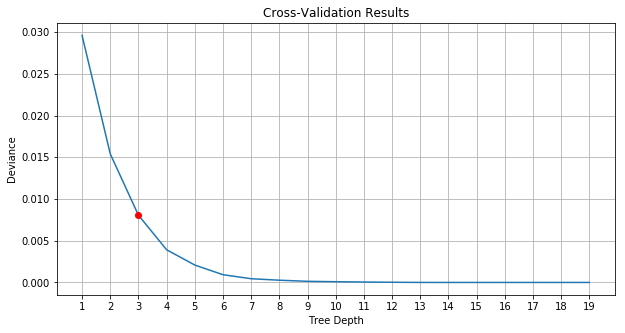

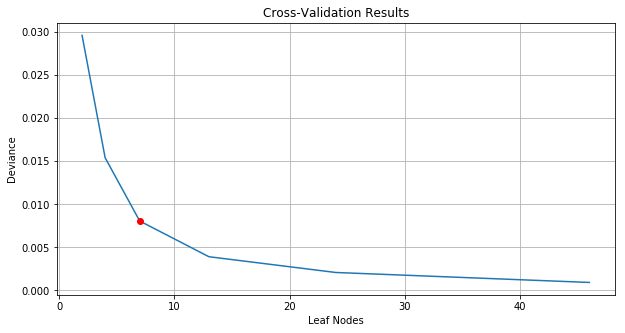

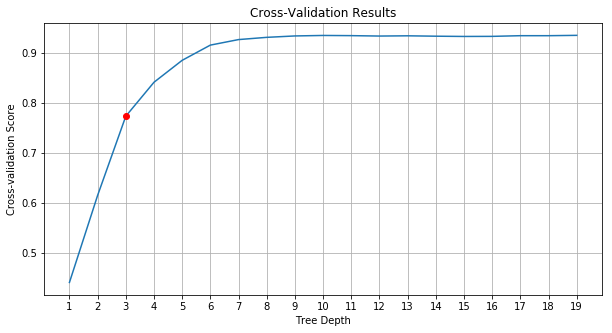

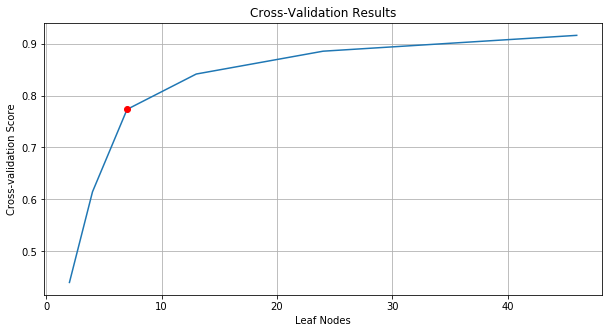

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score

# Leaf nodes boolean list
def leafNodes(tree_reg):
    n_nodes = tree_reg.tree_.node_count
    children_left = tree_reg.tree_.children_left
    children_right = tree_reg.tree_.children_right
    # The tree structure can be traversed to compute various properties such
    # as the depth of each node and whether or not it is a leaf.
    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, -1)]  # seed is the root node id and its parent depth
    while len(stack) > 0:
        node_id, parent_depth = stack.pop()
        node_depth[node_id] = parent_depth + 1
    
        # If we have a test node
        if (children_left[node_id] != children_right[node_id]):
            stack.append((children_left[node_id], parent_depth + 1))
            stack.append((children_right[node_id], parent_depth + 1))
        else:
            is_leaves[node_id] = True
            
    return is_leaves
    #return len(is_leaves[is_leaves == True])

sizes = []
deviance = []
scores = []
for k in range(1, 20):
    tree_regk = DecisionTreeRegressor(max_depth=k).fit(X, y)
    sse = ((y - tree_regk.predict(X)) ** 2).sum()
    is_leaves = leafNodes(tree_regk)
    d = len(is_leaves[is_leaves == True])
    dev = sse / (len(y) - d)
    sizes.append(d)
    deviance.append(dev)
    cv = cross_val_score(estimator=tree_regk, X=X, y=y, cv=10, n_jobs=1)
    scores.append(cv.mean())

fig = plt.figure(figsize=(10, 5))
plt.xticks(np.arange(0, 20, step=1))
plt.plot(range(1, 20), deviance)
plt.grid(True)
plt.title('Cross-Validation Results')
plt.xlabel('Tree Depth')
plt.ylabel('Deviance')
plt.plot(3, deviance[3 - 1], 'ro')
plt.show()

fig = plt.figure(figsize=(10, 5))
#plt.xticks(np.arange(0, 20, step=1))
plt.plot(sizes[0:6], deviance[0:6])
plt.grid(True)
plt.title('Cross-Validation Results')
plt.xlabel('Leaf Nodes')
plt.ylabel('Deviance')
plt.plot(sizes[3 - 1], deviance[3 - 1], 'ro')
plt.show()

fig = plt.figure(figsize=(10, 5))
plt.xticks(np.arange(0, 20, step=1))
plt.plot(range(1, 20), scores)
plt.grid(True)
plt.title('Cross-Validation Results')
plt.xlabel('Tree Depth')
plt.ylabel('Cross-validation Score')
plt.plot(3, scores[3 - 1], 'ro')
plt.show()

fig = plt.figure(figsize=(10, 5))
#plt.xticks(np.arange(0, 20, step=1))
plt.plot(sizes[0:6], scores[0:6])
plt.grid(True)
plt.title('Cross-Validation Results')
plt.xlabel('Leaf Nodes')
plt.ylabel('Cross-validation Score')
plt.plot(sizes[3 - 1], scores[3 - 1], 'ro')
plt.show()

## Regression Tree with depth = 3

In [27]:
tree_reg = DecisionTreeRegressor(max_depth=3).fit(X, y)

export_graphviz(
        tree_reg,
        out_file="sp500_tree1.dot",
        feature_names=returns.columns,
        rounded=True,
        filled=True
    )

!dot -Tpng sp500_tree1.dot -o sp500_tree1.png

/bin/sh: dot: command not found


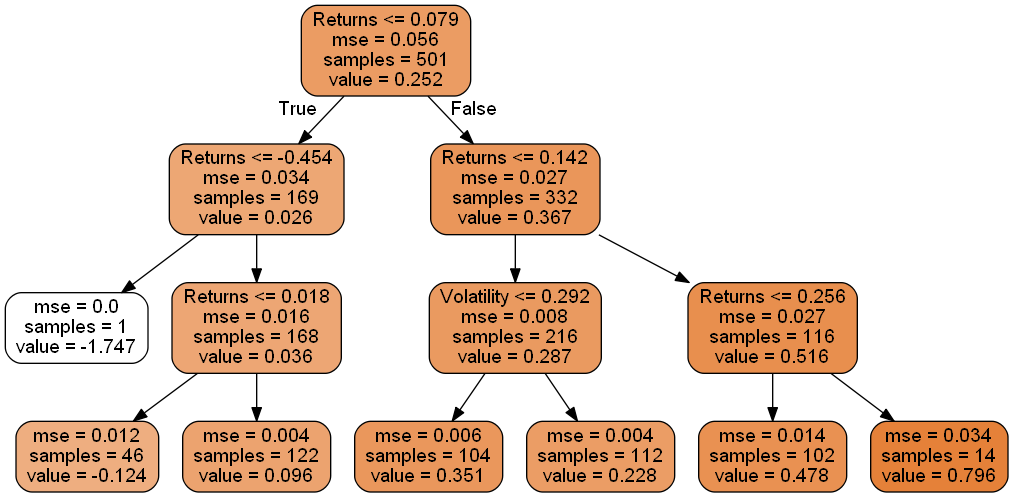

In [28]:
from IPython.display import Image
Image("sp500_tree1.png")

In [29]:
is_leaves = leafNodes(tree_reg)
d = len(is_leaves[is_leaves == True])
print('Depth of Tree: 3')
print('Number of Leaf Nodes: ', d)

Depth of Tree: 3
Number of Leaf Nodes:  7


# Model Diagnostic

RMSE:  0.0892
STD(y):  0.2358
Goodness-of-fit Measure: 0.857


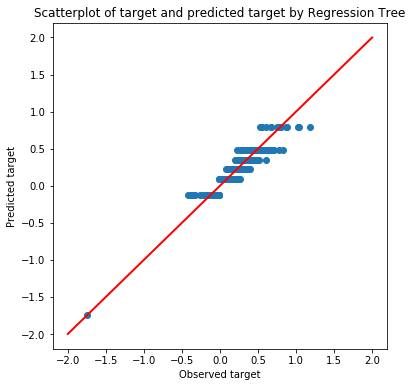

In [30]:
from sklearn.metrics import r2_score
yhat = tree_reg.predict(X)
print("RMSE: ", np.round(np.sqrt(((y - yhat)**2).mean(axis=0)),4))
print("STD(y): ", np.round(y.std(),4))
print("Goodness-of-fit Measure:", np.round(r2_score(y, yhat),4))

plt.figure(1, figsize=(6,6))
plt.title("Scatterplot of target and predicted target by Regression Tree")
plt.ylabel("Predicted target")
plt.xlabel("Observed target")
plt.scatter(y=yhat, x=y)
plt.plot([-2,2], [-2,2], "r-", linewidth=2)
plt.show()

## Clustering Plot

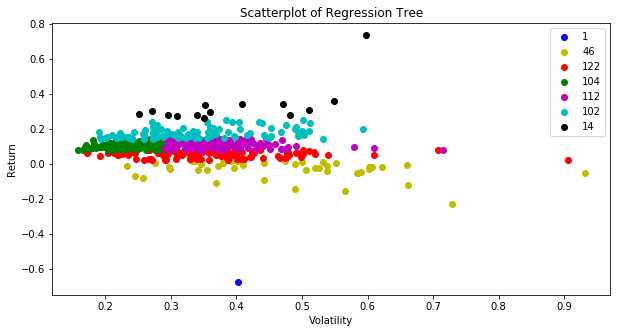

In [31]:
nodes = tree_reg.tree_.value[:,0,0][is_leaves == True]
colors = ['ob', 'oy', 'or', 'og', 'om', 'oc', 'ok']
plt.figure(figsize=(10, 5))
for i in range(0, len(nodes)):
    plt.plot(X[yhat == nodes[i],1], X[yhat == nodes[i],0], colors[i])

plt.title("Scatterplot of Regression Tree")
plt.ylabel("Return")
plt.xlabel("Volatility")
plt.legend(tree_reg.tree_.n_node_samples[is_leaves == True])
plt.show()

In [32]:
chosen_tick_tree = list(returns.index[yhat == nodes[6]])
print('Stocks with the Highest Sharpe Ratio: \n', chosen_tick_tree)

Stocks with the Highest Sharpe Ratio: 
 ['AAPL', 'AVGO', 'CHTR', 'FBHS', 'HPE', 'HII', 'ILMN', 'LYB', 'MA', 'MNST', 'NFLX', 'PCLN', 'REGN', 'TDG']


# Functions

In [33]:
chosen_tick = chosen_tick_tree ## Initialize chosen_tick

def MA(df, n):
    MA = df.rolling(n).mean()
    MA.columns = df.columns
    return MA
# Bollinger Bands
def BBANDS(df, n, multiple, H_price_name='High', L_price_name='Low', C_price_name='Adj Close'):
    MA = df.rolling(n).mean()
    MSD = df.rolling(n).std()
    ub1 = MA + multiple * MSD
    uB1 = pd.DataFrame(ub1, index=df.index, columns=df.columns)
    lb1 = MA - multiple * MSD
    lB1 = pd.DataFrame(lb1, index=df.index, columns=df.columns)
    b2 = (df - MA + multiple * MSD) / (2 * multiple * MSD)
    B2 = pd.DataFrame(b2, index=df.index, columns=df.columns)
    BBAND = pd.concat([MA, uB1, lB1, B2], keys=['Mean', 'UpperBand', 'LowerBand', '%B'], axis=1)
    return BBAND
# Average True Range
def ATR(df, n, H_price_name='High', L_price_name='Low', C_price_name='Close'):
    i = 0
    TR_l = [0]
    while i < len(df.index) - 1:
        TR = max(df[H_price_name][i + 1], df[C_price_name][i]) - min(df[L_price_name][i + 1], df[C_price_name][i])
        TR_l.append(TR)
        i = i + 1
    TR_s = pd.Series(TR_l, index=df.index)
    ATR = pd.DataFrame(TR_s.ewm(span=n, min_periods=n).mean(), columns=['ATR_%s' % n])
    return ATR
# Momentum
def MOM(df, n, C_price_name='Close'):
    M = pd.Series(df[C_price_name].diff(n), name='Momentum_' + str(n))
    return M
# Keltner Channel
def KELCH(df, n, std, H_price_name='High', L_price_name='Low', C_price_name='Close'):
    KelChM = pd.Series(df[C_price_name].rolling(n).mean())
    ATR_value = ATR(df, n, H_price_name, L_price_name, C_price_name)['ATR_%s' % n]
    KelChU = KelChM + std * ATR_value
    KelChD = KelChM - std * ATR_value

    KEL = pd.concat([KelChU, KelChM, KelChD], keys=['KelChU', 'KelChM', 'KelChD'], axis=1)
    return KEL
# Keltner Channel
def SQUEEZE(df, b_n, b_std, k_n, k_std, H_price_name='High', L_price_name='Low', C_price_name='Close'):
    BBAND = BBANDS(df[[C_price_name]], b_n, b_std)
    BBAND.columns = BBAND.columns.get_level_values(0)
    UB_B = BBAND['UpperBand']
    LB_B = BBAND['LowerBand']

    KEL = KELCH(df, k_n, k_std, H_price_name, L_price_name, C_price_name)
    UB_K = KEL['KelChU']
    LB_K = KEL['KelChD']

    check = pd.concat([BBAND, KEL], axis=1)

    Signal = pd.DataFrame(((UB_B < UB_K) & (LB_B > LB_K)).astype(int), columns=['squeeze'])
    Signal['Momentum'] = MOM(df, k_n, C_price_name)

    return Signal, check
# Relative Strength Index
def RSI(df, n, H_price_name='High', L_price_name='Low'):
    i = 0
    UpI = [0]
    DoI = [0]
    while i + 1 <= len(df.index) - 1:
        UpMove = df[H_price_name][i + 1] - df[H_price_name][i]
        DoMove = df[L_price_name][i] - df[L_price_name][i + 1]
        if UpMove > DoMove and UpMove > 0:
            UpD = UpMove
        else:
            UpD = 0
        UpI.append(UpD)
        if DoMove > UpMove and DoMove > 0:
            DoD = DoMove
        else:
            DoD = 0
        DoI.append(DoD)
        i = i + 1
    UpI = pd.DataFrame(UpI, index=df.index)
    DoI = pd.DataFrame(DoI, index=df.index)
    PosDI = pd.DataFrame(UpI.ewm(span=n, min_periods=n - 1).mean())
    NegDI = pd.DataFrame(DoI.ewm(span=n, min_periods=n - 1).mean())
    RSI = 100.0 - 100.0 / (1 + (PosDI / NegDI))
    RSI.columns = ['RSI']
    return RSI
# MACD, MACD Signal and MACD difference
def MACD(df, n_fast, n_slow, C_price_name='Close'):
    EMAfast = df[C_price_name].ewm(span=n_fast, min_periods=n_slow - 1).mean()
    EMAslow = df[C_price_name].ewm(span=n_slow, min_periods=n_slow - 1).mean()
    MACD = pd.Series(EMAfast - EMAslow, name='MACD_' + str(n_fast) + '_' + str(n_slow))
    MACDsign = pd.Series(MACD.ewm(span=9, min_periods=8).mean(), name='MACDsign_' + str(n_fast) + '_' + str(n_slow))
    MACDdiff = pd.Series(MACD - MACDsign, name='MACDdiff_' + str(n_fast) + '_' + str(n_slow))
    MACD = pd.concat([MACD, MACDsign, MACDdiff], axis=1)

    return MACD
def performance_matrics(port_value, output=False):
    # annual volatility
    ann_vol = np.log(port_value).diff().std() * np.sqrt(252)
    port_return = pd.DataFrame(index=port_value.index[:], columns=['Values'])
    port_return['Values'] = port_value.pct_change()

    # cumulative return series & max drawdown, max drawdown duration
    port_cum_series = pd.DataFrame(index=port_return.index[:],
                                   columns=['CumulativeReturn', 'WaterMark', 'Drawdown', 'Dwn_Duration'])

    for i in range(len(port_return)):
        if i == 0:
            port_cum_series['CumulativeReturn'].iloc[i] = 0
            port_cum_series['WaterMark'].iloc[i] = port_cum_series['CumulativeReturn'].iloc[i]
        else:
            port_cum_series['CumulativeReturn'].iloc[i] = (1 + port_return['Values'].iloc[i]) * (
                        1 + port_cum_series['CumulativeReturn'].iloc[i - 1]) - 1
            if port_cum_series['CumulativeReturn'].iloc[i] > port_cum_series['WaterMark'].iloc[i - 1]:
                port_cum_series['WaterMark'].iloc[i] = port_cum_series['CumulativeReturn'].iloc[i]
            else:
                port_cum_series['WaterMark'].iloc[i] = port_cum_series['WaterMark'].iloc[i - 1]

        port_cum_series['Drawdown'].iloc[i] = ((1 + port_cum_series['WaterMark'].iloc[i]) - (
                    1 + port_cum_series['CumulativeReturn'].iloc[i])) / (1 + port_cum_series['WaterMark'].iloc[i])
        if i == 0:
            port_cum_series['Dwn_Duration'].iloc[i] = 0
        else:
            if port_cum_series['Drawdown'].iloc[i] != 0:
                port_cum_series['Dwn_Duration'].iloc[i] = port_cum_series['Dwn_Duration'].iloc[i - 1] + 1
            else:
                port_cum_series['Dwn_Duration'].iloc[i] = 0

    max_drawdown = port_cum_series['Drawdown'].max()
    max_dwn_duration = port_cum_series['Dwn_Duration'].max()
    total_return = port_value.iloc[-1] / port_value.iloc[0] - 1

    # annual return
    ann_return = (1 + total_return) ** (1 / float((len(port_value)) / 252.0)) - 1

    # sharpe ratio
    rf = 0.024
    sharpe_ratio = (ann_return - rf) / ann_vol

    print('annual volatility:{}'.format(ann_vol.iloc[0]))
    print('annual return:{}'.format(ann_return.iloc[0]))
    print('sharpe ratio:{}'.format(sharpe_ratio.iloc[0]))
    print('max drawdown:{}'.format(max_drawdown))
    print('max down duration:{} days'.format(max_dwn_duration))
def record_transaction(symbol, action_side, date, price, quantity, fee, transaction_history):
    '''
    action_side: long or close
    date: date for executing the action
    quantity: position size
    fee: one trip cost
    transaction_history: record all the transaction here
    '''

    info = {
        'Date': date,
        'Action': action_side,
        'Price': price,
        'Quantity': quantity,
        'Fee': fee
    }
    if symbol in transaction_history:
        transaction_history[symbol].append(info)
    else:
        transaction_history.update({symbol: [info]})

    return transaction_history
def record_holdings(symbol, starting_point, price, shares_change, fee, holdings, target=np.nan):
    '''
    starting_point: date for executing the action
    quantity: +/- position size
    fee: one trip cost
    holdings: record all the stock holdings info
    target: default is "nan", or you can specify the price level you prefer
    '''
    if symbol in holdings:

        if math.isnan(target):
            target = holdings[symbol]['Target']

        info = {
            'Index': starting_point,
            'Price': price,
            'Quantity': holdings[symbol]['Quantity'] + shares_change,
            'Fee': fee,
            'Target': target
        }
        if info['Quantity'] == 0:
            del holdings[symbol]
        else:
            holdings[symbol].update(info)
    else:
        info = {
            'Index': starting_point,
            'Price': price,
            'Quantity': shares_change,
            'Fee': fee,
            'Target': target
        }
        holdings.update({symbol: info})

    return holdings

# Settings

In [34]:
#strategy parameters
int_capital = 1000000
pos_num = 10
capital_per_trade_pct = 1. / pos_num
bband_mean = 20
bband_stdev = 2

In [35]:
#sp500_sorted[3021:]

In [36]:
#list(sp500_sorted)

In [37]:
#Mat_col = []
#for i in range(505):
    #Mat_col.append(list(sp500)[i*4][0])
#Mat_col    

In [38]:
Mat_col = []
for i in range(505):
    Mat_col.append(list(sp500)[i*4][0])
PriceMat = sp500[3021:] ###################
#delet it if labels not in chosen
for symbol in Mat_col:
    if symbol not in chosen_tick:
        PriceMat.drop(symbol,axis = 1,inplace=True)

#if want to run the chosen tick, change all the Mat_col to chosen_tick
newPriceMat = pd.DataFrame(data=np.zeros((len(PriceMat), len(chosen_tick))), index=pd.to_datetime(PriceMat.index[:]), columns = chosen_tick)
for symbol in chosen_tick:
    newPriceMat[symbol] = PriceMat[symbol]['Adj Close']

/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# Regression tree Chosen Set Main( ) for Strategy

testing set from 2017-01 to 2018-12-24

In [39]:
SignalMat = BBANDS(newPriceMat, bband_mean, bband_stdev)
SquSingal = pd.DataFrame(data=np.zeros((len(PriceMat), len(chosen_tick))), index=pd.to_datetime(PriceMat.index[:]), columns = chosen_tick)
MoSingal = pd.DataFrame(data=np.zeros((len(PriceMat), len(chosen_tick))), index=pd.to_datetime(PriceMat.index[:]), columns = chosen_tick)
for symbol in chosen_tick:
    SquSingal[symbol] = SQUEEZE(PriceMat[symbol], 20, 2, 20, 2, 'Adj High', 'Adj Low', 'Adj Close')[0]['squeeze']
    MoSingal[symbol] = SQUEEZE(PriceMat[symbol], 20, 2, 20, 2, 'Adj High', 'Adj Low', 'Adj Close')[0]['Momentum']

cash_value = pd.DataFrame(data=np.zeros((len(PriceMat), 1)), index=PriceMat.index[:], columns=['Values'])
pos_value = pd.DataFrame(data=np.zeros((len(PriceMat), 1)), index=PriceMat.index[:], columns=['Values'])
total_port_valuetree = pd.DataFrame(data=np.zeros((len(PriceMat), 1)), index=PriceMat.index[:], columns=['Values'])

# record transactions
holding_stocks = {}
transaction_history = {}

#Main strategy
for i in range(0, len(PriceMat)):
    if i == 0:
        cash_value.iloc[i, 0] = int_capital
        total_port_valuetree.iloc[i, 0] = cash_value.iloc[i, 0]
    else:
        cash_value.iloc[i, 0] = cash_value.iloc[i - 1, 0]
        # do the mark to market
        for symbol in holding_stocks.keys():
            today_price = newPriceMat[symbol].iloc[i]
            shares = holding_stocks[symbol]['Quantity']
            pos_value.iloc[i, 0] += shares * today_price

        # check if postion needs to exit
        if len(holding_stocks.keys()) != 0:
            for symbol in list(holding_stocks):
                prior_day_price = newPriceMat[symbol].iloc[i - 1]
                prior_day_signal = SignalMat['Mean'][symbol].iloc[i - 1]
                today_price = newPriceMat[symbol].iloc[i]
                date = newPriceMat[symbol].index[i]
                shares = holding_stocks[symbol]['Quantity']
                # if meet criteria => exit position
                if prior_day_price >= prior_day_signal:
                    cash_value.iloc[i, 0] = cash_value.iloc[i, 0] + shares * today_price
                    pos_value.iloc[i, 0] -= shares * today_price
                    holding_stocks = record_holdings(symbol, 0, today_price, -shares, 0, holding_stocks)
                    transaction_history = record_transaction(symbol, 'close', date, today_price, shares, 0,
                                                             transaction_history)

        total_port_valuetree.iloc[i, 0] = pos_value.iloc[i, 0] + cash_value.iloc[i, 0]

        # Add more positions
        if len(holding_stocks.keys()) < pos_num:
            for symbol in newPriceMat.columns:
                if symbol not in holding_stocks.keys():
                    # check if signal meets
                    prior_day_price = newPriceMat[symbol].iloc[i - 1]
                    cash_allocate = capital_per_trade_pct * total_port_valuetree.iloc[i, 0]
                    today_price = newPriceMat[symbol].iloc[i]
                    date = newPriceMat[symbol].index[i]
                    holding_cash = cash_value.iloc[i, 0]
                    high = newPriceMat[symbol].rolling(52).max().iloc[i]
                    squee = SquSingal[symbol].iloc[i]
                    Mo = MoSingal[symbol].iloc[i]
                    if math.isnan(prior_day_price) == False and math.isnan(Mo) == False and math.isnan(high) == False and cash_allocate <= holding_cash:
                        if squee == 1 and abs(today_price - high) < high*0.05 and Mo > 0:
                            shares = cash_allocate / today_price
                            cash_value.iloc[i, 0] = holding_cash - cash_allocate
                            pos_value.iloc[i, 0] += cash_allocate
                            holding_stocks = record_holdings(symbol, i, today_price, shares, 0, holding_stocks)
                            transaction_history = record_transaction(symbol, 'long', date, today_price, shares, 0, transaction_history)
                else:
                    continue

    # update total value of portfolio
    total_port_valuetree.iloc[i, 0] = pos_value.iloc[i, 0] + cash_value.iloc[i, 0]

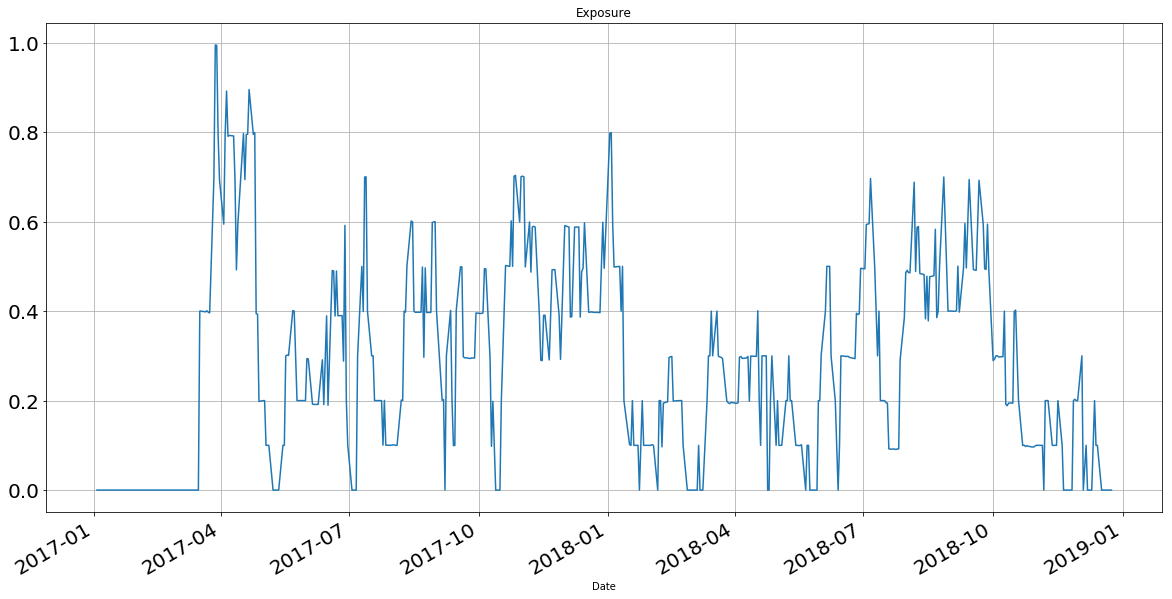

In [40]:
exposure = (1 - (cash_value / total_port_valuetree))
exposure.iloc[:, 0].plot(figsize= (20, 10), title = 'Exposure', fontsize = 20, grid = True)

In [41]:
transaction_info = pd.DataFrame()
for symbol in transaction_history.keys():
    symbol_transaction = pd.DataFrame(transaction_history[symbol])
    symbol_transaction['symbol'] = symbol
    transaction_info = pd.concat([transaction_info, symbol_transaction])

transaction_info.reset_index(inplace = True)
transaction_info.drop('index', axis = 1, inplace = True)

In [42]:
transaction_info.count()

Action      1784
Date        1784
Fee         1784
Price       1784
Quantity    1784
symbol      1784
dtype: int64

# Hierarchical Clustering

In [43]:
x = returns['Volatility']
y = returns['Returns']

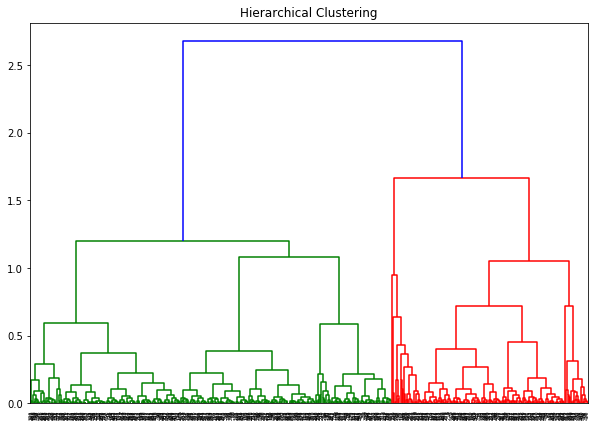

In [44]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Hierarchical Clustering")  
dend = shc.dendrogram(shc.linkage(returns, method='ward'))  
plt.show()

# Cross Validation

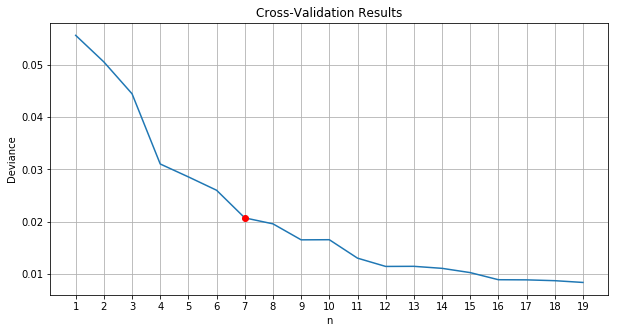

In [45]:
from sklearn.cluster import AgglomerativeClustering
sharperatio = (returns['Returns'] - 0.024)/returns['Volatility']
# Cross Validation
deviance = []
pred = []
for k in range(1, 20):
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    cl = cluster.fit_predict(returns)
    returns = pd.DataFrame(returns, columns = ['Returns', 'Volatility']) 
    cl = pd.DataFrame(cl, columns = ['Cluster Label'])
    index = pd.DataFrame(returns.index)
    labels = index.join(cl)
    labels.columns = ['ID', 'Cluster Label']
    labels = labels.set_index('ID')
    sr = labels.join(pd.DataFrame(sharperatio, columns = ['Sharpe Ratio']))
    A = sr.groupby(['Cluster Label']).mean()
    B = pd.DataFrame(cluster.fit_predict(returns), columns=['Cluster Label'])
    C = B.join(A, on='Cluster Label')
    if k == 7:
        pred = np.asarray(C['Sharpe Ratio'])
    diff = np.asarray(sharperatio) - np.asarray(C['Sharpe Ratio'])
    sse = (diff ** 2).sum()
    dev = sse / (len(y) - k)
    deviance.append(dev)

fig = plt.figure(figsize=(10, 5))
plt.xticks(np.arange(0, 20, step=1))
plt.plot(range(1, 20), deviance)
plt.grid(True)
plt.title('Cross-Validation Results')
plt.xlabel('n')
plt.ylabel('Deviance')
plt.plot(7, deviance[7 - 1], 'ro')
plt.show()

In [46]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')  
cluster.fit_predict(returns)
cl = cluster.fit_predict(returns)
print (cl)
#print(cluster.fit_predict(returns))

[4 2 4 3 3 2 2 1 3 5 2 1 2 2 1 4 2 0 2 1 3 0 4 3 2 4 1 3 4 4 3 4 5 4 2 5 3
 4 2 4 3 1 3 2 1 0 3 1 4 2 2 3 1 3 1 5 4 1 4 2 4 3 1 1 4 5 4 2 4 4 2 2 2 1
 1 2 2 1 4 3 4 1 1 2 2 4 2 4 2 1 1 4 5 0 3 2 4 1 3 0 2 3 5 4 2 1 4 2 2 1 4
 1 5 3 1 2 4 4 2 4 1 2 4 0 1 4 3 1 4 1 3 1 3 2 4 2 4 1 4 1 5 4 2 3 2 2 2 1
 3 3 4 1 3 4 4 2 5 1 1 1 4 4 3 2 1 4 5 2 1 4 2 2 1 1 4 4 1 2 1 3 2 4 2 3 1
 1 1 3 5 1 4 1 2 2 2 1 2 4 3 1 5 1 2 3 4 1 5 4 1 4 3 3 1 2 4 2 2 2 3 5 3 3
 2 2 4 2 0 4 2 4 4 4 2 1 2 5 3 3 4 4 0 0 1 1 0 4 2 2 4 3 0 2 4 1 3 2 4 4 1
 2 2 2 4 5 4 2 1 1 1 4 4 2 4 4 2 1 5 2 4 5 2 4 1 1 3 1 2 2 2 2 1 4 2 2 3 1
 4 4 3 4 4 2 3 5 2 1 2 1 1 1 4 4 1 0 1 5 1 1 2 2 1 2 0 1 2 2 1 1 4 4 3 4 2
 2 1 1 4 3 1 2 0 3 1 4 3 1 1 3 1 1 4 1 1 1 4 1 3 4 4 4 3 4 2 2 1 4 4 4 3 2
 4 1 2 2 4 2 5 2 5 1 2 4 2 2 4 1 2 2 0 5 4 3 1 1 4 3 3 2 1 0 2 4 1 1 2 1 4
 3 2 2 0 2 3 4 1 1 1 2 4 4 2 1 3 4 4 2 2 1 1 2 1 2 2 4 1 4 2 1 4 3 1 1 3 1
 1 3 3 2 1 1 1 1 1 0 0 6 3 5 1 4 0 4 3 2 3 2 1 2 1 4 4 0 1 3 2 1 4 1 4 1 4
 2 1 2 1 1 1 2 2 1 2 2 4 

In [47]:
returns = pd.DataFrame(returns, columns = ['Returns', 'Volatility']) 
cl = pd.DataFrame(cl, columns = ['Cluster Label'])
#returns.join(cl)

In [48]:
sharperatio = (returns['Returns'] - 0.024)/returns['Volatility']

# Summary
index = pd.DataFrame(returns.index)
labels = index.join(cl)
labels.columns = ['ID', 'Cluster Label']
labels = labels.set_index('ID')
sr = labels.join(pd.DataFrame(sharperatio, columns = ['Sharpe Ratio']))
sr_mean = sr.groupby(['Cluster Label']).mean()
print(sr_mean)
summary = returns.join(sr)
print(summary)

               Sharpe Ratio
Cluster Label              
0                  0.442025
1                  0.134668
2                  0.174075
3                  0.535957
4                  0.365853
5                 -0.091157
6                 -1.746544
        Returns  Volatility  Cluster Label  Sharpe Ratio
MMM    0.090085    0.216496              4      0.305250
AOS    0.181532    0.356813              2      0.441496
ABT    0.061343    0.203863              4      0.183178
ABBV   0.180369    0.273371              3      0.572003
ACN    0.142568    0.258949              3      0.457880
ATVI   0.163701    0.358701              2      0.389463
AYI    0.179133    0.366555              2      0.423219
ADBE   0.100588    0.336640              1      0.227507
AAP    0.150775    0.316681              3      0.400322
AMD   -0.053030    0.586054              5     -0.131439
AES    0.005560    0.379866              2     -0.048544
AET    0.123116    0.348655              1      0.284280
AMG    

# Clustering Plot

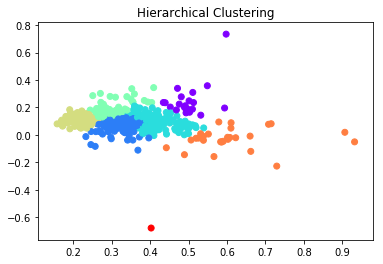

In [49]:
plt.title("Hierarchical Clustering")
plt.scatter(x, y, c=cluster.labels_, cmap='rainbow')
plt.show()

# Model Diagnostic

Goodness-of-fit Measure: 0.6327


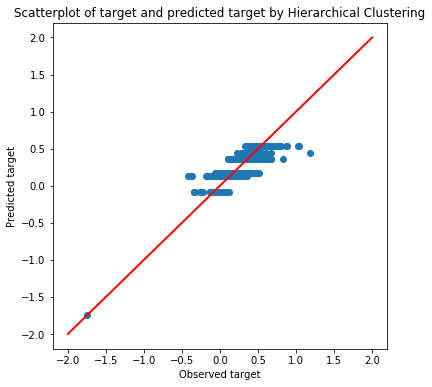

In [50]:
# Goodness of fit
from sklearn.metrics import r2_score
print("Goodness-of-fit Measure:", np.round(r2_score(np.asarray(sharperatio), pred),4))

plt.figure(1, figsize=(6,6))
plt.title("Scatterplot of target and predicted target by Hierarchical Clustering")
plt.ylabel("Predicted target")
plt.xlabel("Observed target")
plt.scatter(y=pred, x=np.asarray(sharperatio))
plt.plot([-2,2], [-2,2], "r-", linewidth=2)
plt.show()

In [51]:
# chosen_tick
chosen_tick_hc = list(summary[summary['Cluster Label'] == 3].index)
len(chosen_tick_hc)

68

In [52]:
chosen_tick_hc

['ABBV',
 'ACN',
 'AAP',
 'ALXN',
 'AGN',
 'GOOGL',
 'AMZN',
 'AMT',
 'AME',
 'APH',
 'ANSS',
 'AAPL',
 'APTV',
 'AZO',
 'AVGO',
 'CELG',
 'CERN',
 'CHTR',
 'CFG',
 'STZ',
 'CCI',
 'CSX',
 'DLR',
 'DG',
 'DLTR',
 'DPS',
 'EW',
 'ESRX',
 'FB',
 'FIS',
 'FBHS',
 'IT',
 'GILD',
 'GPN',
 'HRS',
 'HAS',
 'HCA',
 'HII',
 'IDXX',
 'INTU',
 'JBHT',
 'LYB',
 'MA',
 'MCK',
 'MTD',
 'NKE',
 'NCLH',
 'ORLY',
 'OKE',
 'PKG',
 'PRGO',
 'PSX',
 'PCLN',
 'RMD',
 'ROP',
 'ROST',
 'SHW',
 'SNA',
 'SYF',
 'TMO',
 'TJX',
 'TSCO',
 'TDG',
 'UNP',
 'UHS',
 'VFC',
 'V',
 'YUM']

# Functions

In [53]:
chosen_tick = chosen_tick_hc ## Initialize chosen_tick

def MA(df, n):
    MA = df.rolling(n).mean()
    MA.columns = df.columns
    return MA
# Bollinger Bands
def BBANDS(df, n, multiple, H_price_name='High', L_price_name='Low', C_price_name='Adj Close'):
    MA = df.rolling(n).mean()
    MSD = df.rolling(n).std()
    ub1 = MA + multiple * MSD
    uB1 = pd.DataFrame(ub1, index=df.index, columns=df.columns)
    lb1 = MA - multiple * MSD
    lB1 = pd.DataFrame(lb1, index=df.index, columns=df.columns)
    b2 = (df - MA + multiple * MSD) / (2 * multiple * MSD)
    B2 = pd.DataFrame(b2, index=df.index, columns=df.columns)
    BBAND = pd.concat([MA, uB1, lB1, B2], keys=['Mean', 'UpperBand', 'LowerBand', '%B'], axis=1)
    return BBAND
# Average True Range
def ATR(df, n, H_price_name='High', L_price_name='Low', C_price_name='Close'):
    i = 0
    TR_l = [0]
    while i < len(df.index) - 1:
        TR = max(df[H_price_name][i + 1], df[C_price_name][i]) - min(df[L_price_name][i + 1], df[C_price_name][i])
        TR_l.append(TR)
        i = i + 1
    TR_s = pd.Series(TR_l, index=df.index)
    ATR = pd.DataFrame(TR_s.ewm(span=n, min_periods=n).mean(), columns=['ATR_%s' % n])
    return ATR
# Momentum
def MOM(df, n, C_price_name='Close'):
    M = pd.Series(df[C_price_name].diff(n), name='Momentum_' + str(n))
    return M
# Keltner Channel
def KELCH(df, n, std, H_price_name='High', L_price_name='Low', C_price_name='Close'):
    KelChM = pd.Series(df[C_price_name].rolling(n).mean())
    ATR_value = ATR(df, n, H_price_name, L_price_name, C_price_name)['ATR_%s' % n]
    KelChU = KelChM + std * ATR_value
    KelChD = KelChM - std * ATR_value

    KEL = pd.concat([KelChU, KelChM, KelChD], keys=['KelChU', 'KelChM', 'KelChD'], axis=1)
    return KEL
# Keltner Channel
def SQUEEZE(df, b_n, b_std, k_n, k_std, H_price_name='High', L_price_name='Low', C_price_name='Close'):
    BBAND = BBANDS(df[[C_price_name]], b_n, b_std)
    BBAND.columns = BBAND.columns.get_level_values(0)
    UB_B = BBAND['UpperBand']
    LB_B = BBAND['LowerBand']

    KEL = KELCH(df, k_n, k_std, H_price_name, L_price_name, C_price_name)
    UB_K = KEL['KelChU']
    LB_K = KEL['KelChD']

    check = pd.concat([BBAND, KEL], axis=1)

    Signal = pd.DataFrame(((UB_B < UB_K) & (LB_B > LB_K)).astype(int), columns=['squeeze'])
    Signal['Momentum'] = MOM(df, k_n, C_price_name)

    return Signal, check
# Relative Strength Index
def RSI(df, n, H_price_name='High', L_price_name='Low'):
    i = 0
    UpI = [0]
    DoI = [0]
    while i + 1 <= len(df.index) - 1:
        UpMove = df[H_price_name][i + 1] - df[H_price_name][i]
        DoMove = df[L_price_name][i] - df[L_price_name][i + 1]
        if UpMove > DoMove and UpMove > 0:
            UpD = UpMove
        else:
            UpD = 0
        UpI.append(UpD)
        if DoMove > UpMove and DoMove > 0:
            DoD = DoMove
        else:
            DoD = 0
        DoI.append(DoD)
        i = i + 1
    UpI = pd.DataFrame(UpI, index=df.index)
    DoI = pd.DataFrame(DoI, index=df.index)
    PosDI = pd.DataFrame(UpI.ewm(span=n, min_periods=n - 1).mean())
    NegDI = pd.DataFrame(DoI.ewm(span=n, min_periods=n - 1).mean())
    RSI = 100.0 - 100.0 / (1 + (PosDI / NegDI))
    RSI.columns = ['RSI']
    return RSI
# MACD, MACD Signal and MACD difference
def MACD(df, n_fast, n_slow, C_price_name='Close'):
    EMAfast = df[C_price_name].ewm(span=n_fast, min_periods=n_slow - 1).mean()
    EMAslow = df[C_price_name].ewm(span=n_slow, min_periods=n_slow - 1).mean()
    MACD = pd.Series(EMAfast - EMAslow, name='MACD_' + str(n_fast) + '_' + str(n_slow))
    MACDsign = pd.Series(MACD.ewm(span=9, min_periods=8).mean(), name='MACDsign_' + str(n_fast) + '_' + str(n_slow))
    MACDdiff = pd.Series(MACD - MACDsign, name='MACDdiff_' + str(n_fast) + '_' + str(n_slow))
    MACD = pd.concat([MACD, MACDsign, MACDdiff], axis=1)

    return MACD
def performance_matrics(port_value, output=False):
    # annual volatility
    ann_vol = np.log(port_value).diff().std() * np.sqrt(252)
    port_return = pd.DataFrame(index=port_value.index[:], columns=['Values'])
    port_return['Values'] = port_value.pct_change()

    # cumulative return series & max drawdown, max drawdown duration
    port_cum_series = pd.DataFrame(index=port_return.index[:],
                                   columns=['CumulativeReturn', 'WaterMark', 'Drawdown', 'Dwn_Duration'])

    for i in range(len(port_return)):
        if i == 0:
            port_cum_series['CumulativeReturn'].iloc[i] = 0
            port_cum_series['WaterMark'].iloc[i] = port_cum_series['CumulativeReturn'].iloc[i]
        else:
            port_cum_series['CumulativeReturn'].iloc[i] = (1 + port_return['Values'].iloc[i]) * (
                        1 + port_cum_series['CumulativeReturn'].iloc[i - 1]) - 1
            if port_cum_series['CumulativeReturn'].iloc[i] > port_cum_series['WaterMark'].iloc[i - 1]:
                port_cum_series['WaterMark'].iloc[i] = port_cum_series['CumulativeReturn'].iloc[i]
            else:
                port_cum_series['WaterMark'].iloc[i] = port_cum_series['WaterMark'].iloc[i - 1]

        port_cum_series['Drawdown'].iloc[i] = ((1 + port_cum_series['WaterMark'].iloc[i]) - (
                    1 + port_cum_series['CumulativeReturn'].iloc[i])) / (1 + port_cum_series['WaterMark'].iloc[i])
        if i == 0:
            port_cum_series['Dwn_Duration'].iloc[i] = 0
        else:
            if port_cum_series['Drawdown'].iloc[i] != 0:
                port_cum_series['Dwn_Duration'].iloc[i] = port_cum_series['Dwn_Duration'].iloc[i - 1] + 1
            else:
                port_cum_series['Dwn_Duration'].iloc[i] = 0

    max_drawdown = port_cum_series['Drawdown'].max()
    max_dwn_duration = port_cum_series['Dwn_Duration'].max()
    total_return = port_value.iloc[-1] / port_value.iloc[0] - 1

    # annual return
    ann_return = (1 + total_return) ** (1 / float((len(port_value)) / 252.0)) - 1

    # sharpe ratio
    rf = 0.024
    sharpe_ratio = (ann_return - rf) / ann_vol

    print('annual volatility:{}'.format(ann_vol.iloc[0]))
    print('annual return:{}'.format(ann_return.iloc[0]))
    print('sharpe ratio:{}'.format(sharpe_ratio.iloc[0]))
    print('max drawdown:{}'.format(max_drawdown))
    print('max down duration:{} days'.format(max_dwn_duration))
def record_transaction(symbol, action_side, date, price, quantity, fee, transaction_history):
    '''
    action_side: long or close
    date: date for executing the action
    quantity: position size
    fee: one trip cost
    transaction_history: record all the transaction here
    '''

    info = {
        'Date': date,
        'Action': action_side,
        'Price': price,
        'Quantity': quantity,
        'Fee': fee
    }
    if symbol in transaction_history:
        transaction_history[symbol].append(info)
    else:
        transaction_history.update({symbol: [info]})

    return transaction_history
def record_holdings(symbol, starting_point, price, shares_change, fee, holdings, target=np.nan):
    '''
    starting_point: date for executing the action
    quantity: +/- position size
    fee: one trip cost
    holdings: record all the stock holdings info
    target: default is "nan", or you can specify the price level you prefer
    '''
    if symbol in holdings:

        if math.isnan(target):
            target = holdings[symbol]['Target']

        info = {
            'Index': starting_point,
            'Price': price,
            'Quantity': holdings[symbol]['Quantity'] + shares_change,
            'Fee': fee,
            'Target': target
        }
        if info['Quantity'] == 0:
            del holdings[symbol]
        else:
            holdings[symbol].update(info)
    else:
        info = {
            'Index': starting_point,
            'Price': price,
            'Quantity': shares_change,
            'Fee': fee,
            'Target': target
        }
        holdings.update({symbol: info})

    return holdings

# Settings

In [54]:
#strategy parameters
int_capital = 1000000
pos_num = 10
capital_per_trade_pct = 1. / pos_num
bband_mean = 20
bband_stdev = 2

In [55]:
Mat_col = []
for i in range(505):
    Mat_col.append(list(sp500)[i*4][0])
PriceMat = sp500[3021:] ###################
#delet it if labels not in chosen
for symbol in Mat_col:
    if symbol not in chosen_tick:
        PriceMat.drop(symbol,axis = 1,inplace=True)

#if want to run the chosen tick, change all the Mat_col to chosen_tick
newPriceMat = pd.DataFrame(data=np.zeros((len(PriceMat), len(chosen_tick))), index=pd.to_datetime(PriceMat.index[:]), columns = chosen_tick)
for symbol in chosen_tick:
    newPriceMat[symbol] = PriceMat[symbol]['Adj Close']

/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# Hierarchical Clustering Chosen Set Main( ) for Strategy

testing set from 2017-01 to 2018-12-24

In [56]:
SignalMat = BBANDS(newPriceMat, bband_mean, bband_stdev)
SquSingal = pd.DataFrame(data=np.zeros((len(PriceMat), len(chosen_tick))), index=pd.to_datetime(PriceMat.index[:]), columns = chosen_tick)
MoSingal = pd.DataFrame(data=np.zeros((len(PriceMat), len(chosen_tick))), index=pd.to_datetime(PriceMat.index[:]), columns = chosen_tick)
for symbol in chosen_tick:
    SquSingal[symbol] = SQUEEZE(PriceMat[symbol], 20, 2, 20, 2, 'Adj High', 'Adj Low', 'Adj Close')[0]['squeeze']
    MoSingal[symbol] = SQUEEZE(PriceMat[symbol], 20, 2, 20, 2, 'Adj High', 'Adj Low', 'Adj Close')[0]['Momentum']

cash_value = pd.DataFrame(data=np.zeros((len(PriceMat), 1)), index=PriceMat.index[:], columns=['Values'])
pos_value = pd.DataFrame(data=np.zeros((len(PriceMat), 1)), index=PriceMat.index[:], columns=['Values'])
total_port_valuehc = pd.DataFrame(data=np.zeros((len(PriceMat), 1)), index=PriceMat.index[:], columns=['Values'])

# record transactions
holding_stocks = {}
transaction_history = {}

#Main strategy
for i in range(0, len(PriceMat)):
    if i == 0:
        cash_value.iloc[i, 0] = int_capital
        total_port_valuehc.iloc[i, 0] = cash_value.iloc[i, 0]
    else:
        cash_value.iloc[i, 0] = cash_value.iloc[i - 1, 0]
        # do the mark to market
        for symbol in holding_stocks.keys():
            today_price = newPriceMat[symbol].iloc[i]
            shares = holding_stocks[symbol]['Quantity']
            pos_value.iloc[i, 0] += shares * today_price

        # check if postion needs to exit
        if len(holding_stocks.keys()) != 0:
            for symbol in list(holding_stocks):
                prior_day_price = newPriceMat[symbol].iloc[i - 1]
                prior_day_signal = SignalMat['Mean'][symbol].iloc[i - 1]
                today_price = newPriceMat[symbol].iloc[i]
                date = newPriceMat[symbol].index[i]
                shares = holding_stocks[symbol]['Quantity']
                # if meet criteria => exit position
                if prior_day_price >= prior_day_signal:
                    cash_value.iloc[i, 0] = cash_value.iloc[i, 0] + shares * today_price
                    pos_value.iloc[i, 0] -= shares * today_price
                    holding_stocks = record_holdings(symbol, 0, today_price, -shares, 0, holding_stocks)
                    transaction_history = record_transaction(symbol, 'close', date, today_price, shares, 0,
                                                             transaction_history)

        total_port_valuehc.iloc[i, 0] = pos_value.iloc[i, 0] + cash_value.iloc[i, 0]

        # Add more positions
        if len(holding_stocks.keys()) < pos_num:
            for symbol in newPriceMat.columns:
                if symbol not in holding_stocks.keys():
                    # check if signal meets
                    prior_day_price = newPriceMat[symbol].iloc[i - 1]
                    cash_allocate = capital_per_trade_pct * total_port_valuehc.iloc[i, 0]
                    today_price = newPriceMat[symbol].iloc[i]
                    date = newPriceMat[symbol].index[i]
                    holding_cash = cash_value.iloc[i, 0]
                    high = newPriceMat[symbol].rolling(52).max().iloc[i]
                    squee = SquSingal[symbol].iloc[i]
                    Mo = MoSingal[symbol].iloc[i]
                    if math.isnan(prior_day_price) == False and math.isnan(Mo) == False and math.isnan(high) == False and cash_allocate <= holding_cash:
                        if squee == 1 and abs(today_price - high) < high*0.05 and Mo > 0:
                            shares = cash_allocate / today_price
                            cash_value.iloc[i, 0] = holding_cash - cash_allocate
                            pos_value.iloc[i, 0] += cash_allocate
                            holding_stocks = record_holdings(symbol, i, today_price, shares, 0, holding_stocks)
                            transaction_history = record_transaction(symbol, 'long', date, today_price, shares, 0, transaction_history)
                else:
                    continue

    # update total value of portfolio
    total_port_valuehc.iloc[i, 0] = pos_value.iloc[i, 0] + cash_value.iloc[i, 0]

In [57]:
transaction_info = pd.DataFrame()
for symbol in transaction_history.keys():
    symbol_transaction = pd.DataFrame(transaction_history[symbol])
    symbol_transaction['symbol'] = symbol
    transaction_info = pd.concat([transaction_info, symbol_transaction])

transaction_info.reset_index(inplace = True)
transaction_info.drop('index', axis = 1, inplace = True)
transaction_info.count()

Action      4839
Date        4839
Fee         4839
Price       4839
Quantity    4839
symbol      4839
dtype: int64

# S&P 500 Main( ) for Strategy 

In [58]:
sp500 = pd.read_excel('SP500_StockPrice.xlsx', header = [0, 1])
sp500.fillna(method = 'ffill', inplace = True)
PriceMat = sp500[3021:] ####################

#要跑挑過的就把所有Mat_col換成chosen_tick
newPriceMat = pd.DataFrame(data=np.zeros((len(PriceMat), len(Mat_col))), index=pd.to_datetime(PriceMat.index[:]), columns = Mat_col)
for symbol in Mat_col:
    newPriceMat[symbol] = PriceMat[symbol]['Adj Close']

SignalMat = BBANDS(newPriceMat, bband_mean, bband_stdev)
SquSingal = pd.DataFrame(data=np.zeros((len(PriceMat), len(Mat_col))), index=pd.to_datetime(PriceMat.index[:]), columns = Mat_col)
MoSingal = pd.DataFrame(data=np.zeros((len(PriceMat), len(Mat_col))), index=pd.to_datetime(PriceMat.index[:]), columns = Mat_col)
for symbol in Mat_col:
    SquSingal[symbol] = SQUEEZE(PriceMat[symbol], 20, 2, 20, 2, 'Adj High', 'Adj Low', 'Adj Close')[0]['squeeze']
    MoSingal[symbol] = SQUEEZE(PriceMat[symbol], 20, 2, 20, 2, 'Adj High', 'Adj Low', 'Adj Close')[0]['Momentum']

cash_value = pd.DataFrame(data=np.zeros((len(PriceMat), 1)), index=PriceMat.index[:], columns=['Values'])
pos_value = pd.DataFrame(data=np.zeros((len(PriceMat), 1)), index=PriceMat.index[:], columns=['Values'])
total_port_valuesp = pd.DataFrame(data=np.zeros((len(PriceMat), 1)), index=PriceMat.index[:], columns=['Values'])

# record transactions
holding_stocks = {}
transaction_history = {}

#Main strategy
for i in range(0, len(PriceMat)):
    if i == 0:
        cash_value.iloc[i, 0] = int_capital
        total_port_valuesp.iloc[i, 0] = cash_value.iloc[i, 0]
    else:
        cash_value.iloc[i, 0] = cash_value.iloc[i - 1, 0]
        # do the mark to market
        for symbol in holding_stocks.keys():
            today_price = newPriceMat[symbol].iloc[i]
            shares = holding_stocks[symbol]['Quantity']
            pos_value.iloc[i, 0] += shares * today_price

        # check if postion needs to exit
        if len(holding_stocks.keys()) != 0:
            for symbol in list(holding_stocks):
                prior_day_price = newPriceMat[symbol].iloc[i - 1]
                prior_day_signal = SignalMat['Mean'][symbol].iloc[i - 1]
                today_price = newPriceMat[symbol].iloc[i]
                date = newPriceMat[symbol].index[i]
                shares = holding_stocks[symbol]['Quantity']
                # if meet criteria => exit position
                if prior_day_price >= prior_day_signal:
                    cash_value.iloc[i, 0] = cash_value.iloc[i, 0] + shares * today_price
                    pos_value.iloc[i, 0] -= shares * today_price
                    holding_stocks = record_holdings(symbol, 0, today_price, -shares, 0, holding_stocks)
                    transaction_history2 = record_transaction(symbol, 'close', date, today_price, shares, 0,
                                                             transaction_history)

        total_port_valuesp.iloc[i, 0] = pos_value.iloc[i, 0] + cash_value.iloc[i, 0]

        # Add more positions
        if len(holding_stocks.keys()) < pos_num:
            for symbol in newPriceMat.columns:
                if symbol not in holding_stocks.keys():
                    # check if signal meets
                    prior_day_price = newPriceMat[symbol].iloc[i - 1]
                    cash_allocate = capital_per_trade_pct * total_port_valuesp.iloc[i, 0]
                    today_price = newPriceMat[symbol].iloc[i]
                    date = newPriceMat[symbol].index[i]
                    holding_cash = cash_value.iloc[i, 0]
                    high = newPriceMat[symbol].rolling(52).max().iloc[i]
                    squee = SquSingal[symbol].iloc[i]
                    Mo = MoSingal[symbol].iloc[i]
                    if math.isnan(prior_day_price) == False and math.isnan(Mo) == False and math.isnan(high) == False and cash_allocate <= holding_cash:
                        if squee == 1 and abs(today_price - high) < high*0.05 and Mo > 0:
                            shares = cash_allocate / today_price
                            cash_value.iloc[i, 0] = holding_cash - cash_allocate
                            pos_value.iloc[i, 0] += cash_allocate
                            holding_stocks = record_holdings(symbol, i, today_price, shares, 0, holding_stocks)
                            transaction_history = record_transaction(symbol, 'long', date, today_price, shares, 0,
                                                                     transaction_history)
                else:
                    continue

    # update total value of portfolio
    total_port_valuesp.iloc[i, 0] = pos_value.iloc[i, 0] + cash_value.iloc[i, 0]

In [59]:
transaction_info = pd.DataFrame()
for symbol in transaction_history.keys():
    symbol_transaction = pd.DataFrame(transaction_history[symbol])
    symbol_transaction['symbol'] = symbol
    transaction_info = pd.concat([transaction_info, symbol_transaction])

transaction_info.reset_index(inplace = True)
transaction_info.drop('index', axis = 1, inplace = True)
transaction_info.count()

Action      5256
Date        5256
Fee         5256
Price       5256
Quantity    5256
symbol      5256
dtype: int64

# Performance plot

Text(0.5, 1.0, 'Portfolio Value')

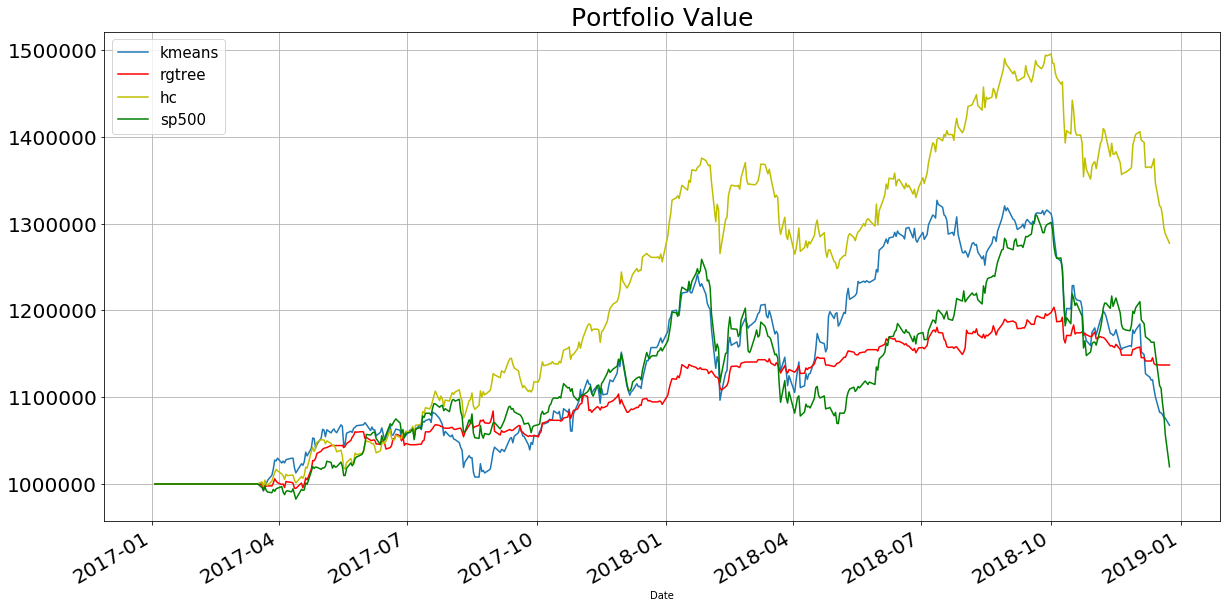

In [60]:
a = total_port_valuekmeans.iloc[:, 0].plot(figsize=(20, 10), title='Portfolio Value', fontsize=20, grid=True)#color='C0'
b = total_port_valuetree.iloc[:, 0].plot(figsize=(20, 10), title='Portfolio Value', fontsize=20, grid=True, color = 'r')
c = total_port_valuehc.iloc[:, 0].plot(figsize=(20, 10), title='Portfolio Value', fontsize=20, grid=True, color = 'y')
d = total_port_valuesp.iloc[:, 0].plot(figsize=(20, 10), title='Portfolio Value', fontsize=20, grid=True, color = 'g')

a.legend (['kmeans', 'rgtree', 'hc','sp500'], prop={'size':15})
a.set_title('Portfolio Value',fontdict={'fontsize':25})


In [61]:
performance_matrics(total_port_valuekmeans)##chosen_tick

annual volatility:0.12897250103962854
annual return:0.03363143252840595
sharpe ratio:0.07467818682872994
max drawdown:0.19539920371128136
max down duration:114 days


In [62]:
performance_matrics(total_port_valuetree)##chosen_tick_tree

annual volatility:0.057725236978963305
annual return:0.06705376360347981
sharpe ratio:0.7458395297566264
max drawdown:0.0553099005419065
max down duration:56 days


In [63]:
performance_matrics(total_port_valuehc)##chosen_tick_hc

annual volatility:0.11982562756376647
annual return:0.13163165198509374
sharpe ratio:0.8982356627159448
max drawdown:0.1458382578144114
max down duration:111 days


In [64]:
performance_matrics(total_port_valuesp)##sp

annual volatility:0.12815478923151963
annual return:0.010008505832789227
sharpe ratio:-0.10917652200991307
max drawdown:0.22163402066656457
max down duration:146 days
